# TAREFA 1

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def func_lorenz(x, y, z, r, s=10, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def plot_t(xs,ys,zs,t,r):
    print('-------------- R = %i ------------ '%(r))
    print('-------------- X(t) ------------ ')
    plt.subplot(221)
    plt.plot(xs,t)
    plt.ylabel('t')
    plt.show()
    print('-------------- Y(t) ------------ ')
    plt.subplot(221)
    plt.plot(ys,t)
    plt.show()
    print('-------------- Z(t) ------------ ')
    plt.subplot(221)
    plt.plot(zs,t)
    plt.show()
    
def Simula_1(valor_r):
    dt = 0.0025
    contador = 100000
    t = [0]
    novo_t = 0
    xs = np.empty((contador + 1,))
    ys = np.empty((contador + 1,))
    zs = np.empty((contador + 1,))


    xs[0], ys[0], zs[0] = (0., 1., 0)
    for i in range(contador):
    
        x_dot, y_dot, z_dot = func_lorenz(xs[i], ys[i], zs[i],valor_r)
        novo_t += dt
        t.append(novo_t)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    plot_t(xs,ys,zs,t,valor_r)
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Modelo de Lorenz  R = %i"%(valor_r))

    plt.show()

-------------- R = 1 ------------ 
-------------- X(t) ------------ 


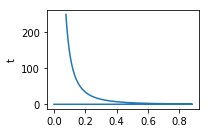

-------------- Y(t) ------------ 


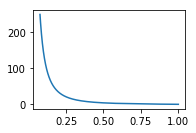

-------------- Z(t) ------------ 


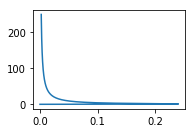

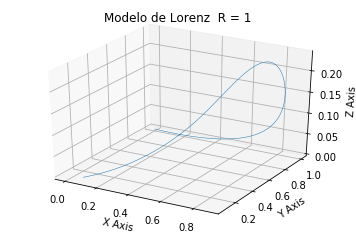

-------------- R = 7 ------------ 
-------------- X(t) ------------ 


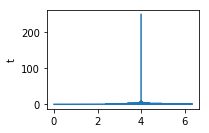

-------------- Y(t) ------------ 


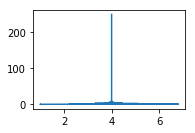

-------------- Z(t) ------------ 


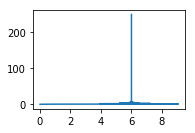

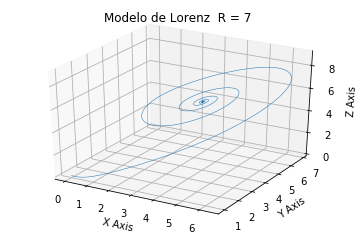

-------------- R = 15 ------------ 
-------------- X(t) ------------ 


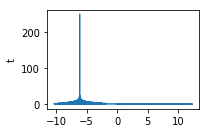

-------------- Y(t) ------------ 


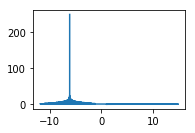

-------------- Z(t) ------------ 


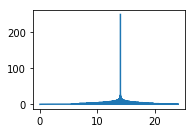

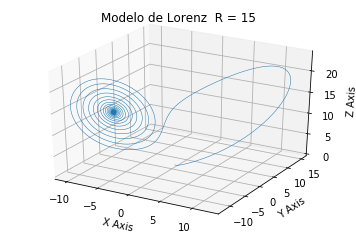

-------------- R = 20 ------------ 
-------------- X(t) ------------ 


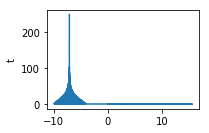

-------------- Y(t) ------------ 


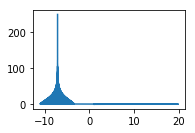

-------------- Z(t) ------------ 


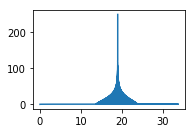

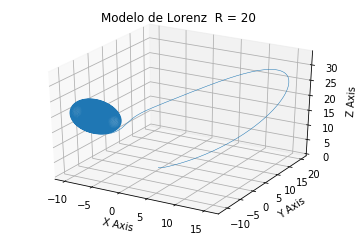

-------------- R = 35 ------------ 
-------------- X(t) ------------ 


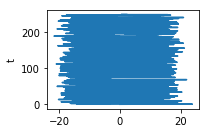

-------------- Y(t) ------------ 


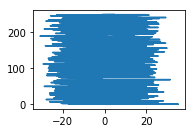

-------------- Z(t) ------------ 


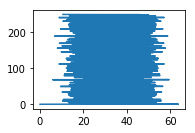

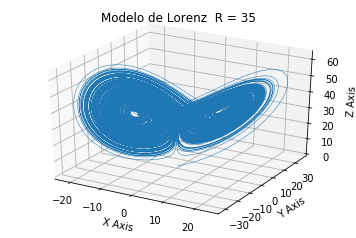

-------------- R = 50 ------------ 
-------------- X(t) ------------ 


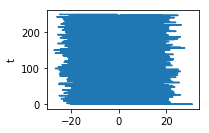

-------------- Y(t) ------------ 


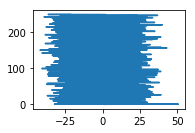

-------------- Z(t) ------------ 


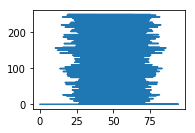

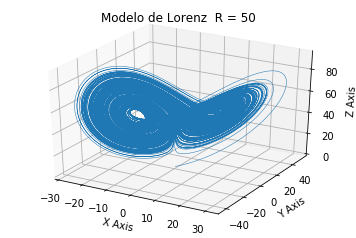

In [27]:
vetor_r = [1, 7, 15, 20, 35, 50]
for i in vetor_r :
    Simula_1(i)

Para valores pequenos de R, o sistema é estável e evolui para um de dois pontos atrativos. Quando R torna-se maior do que aproximadamente 25, os pontos fixos se tornam repulsores. Portanto a trajetória é repelida por eles de um modo muito diferente, evoluindo sem nunca se cruzar sobre si própria.

# TAREFA 2

In [24]:
def simula_2(valor_r,delta,contador):
    dt = 0.0025
    t = [0]
    novo_t = 0
    xs = np.empty((contador + 1,))
    ys = np.empty((contador + 1,))
    zs = np.empty((contador + 1,))
    
    #Condições iniciais
    xs[0], ys[0], zs[0] = (0., 1. + delta, 0)
    for i in range(contador):
        x_dot, y_dot, z_dot = func_lorenz(xs[i], ys[i], zs[i],valor_r)
        novo_t += dt
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return [xs,ys,zs]

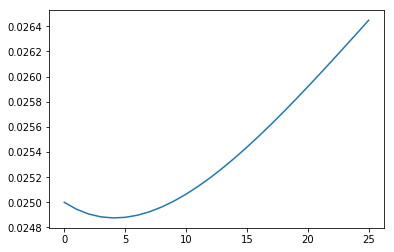

Coeficiente de Lyapunov = 883.864163 para R = 1


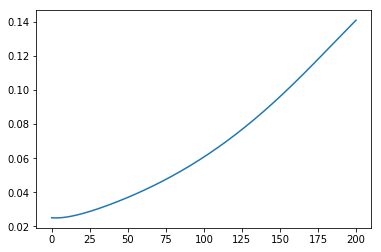

Coeficiente de Lyapunov = 12.983715 para R = 7


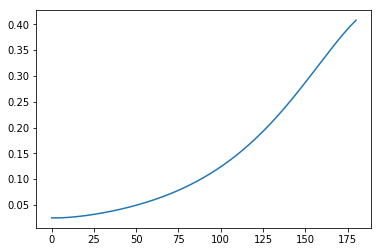

Coeficiente de Lyapunov = 3.559199 para R = 15


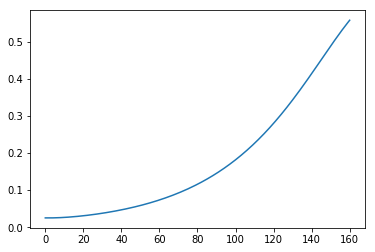

Coeficiente de Lyapunov = 2.502618 para R = 20


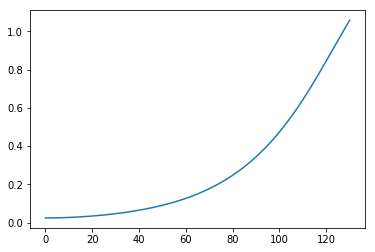

Coeficiente de Lyapunov = 1.245269 para R = 35


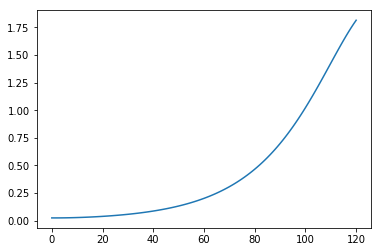

Coeficiente de Lyapunov = 0.695719 para R = 50


In [32]:
from scipy.spatial import distance
from scipy.optimize import curve_fit

def exponenial_func(x,a, b):
    return a*np.exp(b*x)

#Ajuste do tempo para as diferentes simulações
contador = [25,200,180,160,130,120]
for (i,j) in zip(vetor_r,contador):
    delta = 0.025
    
    simul_1 = simula_2(i,delta,j)
    simul_2 = simula_2(i,0,j)
    simul_1 = np.array(simul_1)
    simul_2 = np.array(simul_2)
    d = []

    d = (simul_1 - simul_2)**2
    d = np.sqrt(d[0,:]+d[1,:]+d[2,:])

    plt.plot(range(j+1),d)
    plt.show()


    popt, pcov = curve_fit(exponenial_func, d,range(j+1))
    print('Coeficiente de Lyapunov = %f para R = %i' %(popt[1],i))

# TAREFA 3

In [6]:
from scipy.integrate import odeint
from scipy.signal import argrelmax
import numpy as np
import matplotlib.pyplot as plt

def bifurcacao(resultado):
    plt.clf()
    for i in range (0, len(resultado)):
        plt.plot(np.full(len(resultado[i][1]), resultado[i][0]), resultado[i][1], '.', color = 'red', alpha=0.2)
    plt.xlabel('$Valores \;R$')
    plt.title('Diagrama de Bifurcação')
    plt.show()  

def lorenz(xyz, t, sigma, r, b):
    x, y, z = xyz
    return [-sigma*x + sigma*y, -x*z + r*x - y, x*y - b*z]

def Calcula_3(r, T):
    sigma = 10
    b = 8./3.
    cond_iniciais = [0, 1, 0]
    t = np.arange(0, T+1, 0.0025)
    xyz_t = odeint(lorenz, cond_iniciais, t, args=(sigma, r, b))   
    xs = xyz_t[:, 0]
    ys = xyz_t[:, 1]
    zs = xyz_t[:, 2]
    return xs, ys, zs, t

In [9]:
resultadosx = []
resultadosy = []
resultadosz = []
for r in np.arange(1,201, 1): 
    xs, ys, zs, t = Calcula_3(r, 80) 
    
    cont = int(30/0.0025) 
    #simulação X
    xs = xs[cont:] 
    valoresx = xs[argrelmax(xs)] 
    resultadosx.append([r, valoresx])
    
    #simulação Y
    ys = ys[cont:] 
    valoresy = ys[argrelmax(ys)]
    resultadosy.append([r, valoresy])
    
    #simulação Z
    zs = zs[cont:] 
    valoresz = zs[argrelmax(zs)] 
    resultadosz.append([r, valoresz])


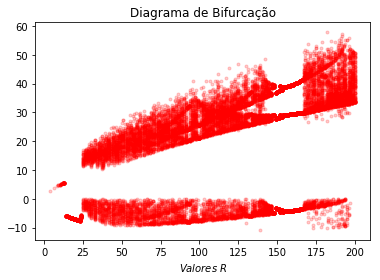

In [10]:
bifurcacao(resultadosx)

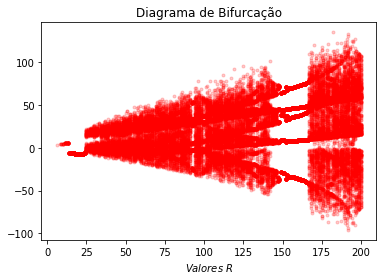

In [11]:
bifurcacao(resultadosy)

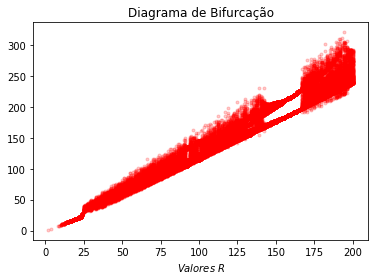

In [12]:
bifurcacao(resultadosz)

É possivel verificar dois comportamentos, o de periodicidade, onde os valores são alteram-se, convergindo a dois pontos. Porém, após um certo valor de R, o fenômeno da caoticidade começa a aparecer, dando inicio a uma bifurcação, fazendo com que o sistema oscile de forma caótica. Esse é o fenômeno denomidado de Atrator de Lorenz.